In [1]:
%matplotlib inline



# Visualizing Evoked data

This tutorial shows the different visualization methods for
:class:`~mne.Evoked` objects.
   :depth: 2

As usual we'll start by importing the modules we need:


In [2]:
import os
import numpy as np
import mne

Instead of creating the :class:`~mne.Evoked` object from an
:class:`~mne.Epochs` object, we'll load an existing :class:`~mne.Evoked`
object from disk. Remember, the :file:`.fif` format can store multiple
:class:`~mne.Evoked` objects, so we'll end up with a :class:`list` of
:class:`~mne.Evoked` objects after loading. Recall also from the
`tut-section-load-evk` section of `the introductory Evoked tutorial
<tut-evoked-class>` that the sample :class:`~mne.Evoked` objects have not
been baseline-corrected and have unapplied projectors, so we'll take care of
that when loading:



In [3]:
sample_data_folder = mne.datasets.sample.data_path()
sample_data_evk_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                    'sample_audvis-ave.fif')
evokeds_list = mne.read_evokeds(sample_data_evk_file, baseline=(None, 0),
                                proj=True, verbose=False)
# show the condition names
for e in evokeds_list:
    print(e.comment)

Left Auditory
Right Auditory
Left visual
Right visual


To make our life easier, let's convert that list of :class:`~mne.Evoked`
objects into a :class:`dictionary <dict>`. We'll use ``/``-separated
dictionary keys to encode the conditions (like is often done when epoching)
because some of the plotting methods can take advantage of that style of
coding.



In [4]:
conds = ('aud/left', 'aud/right', 'vis/left', 'vis/right')
evks = dict(zip(conds, evokeds_list))
#      ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾ this is equivalent to:
# {'aud/left': evokeds_list[0], 'aud/right': evokeds_list[1],
#  'vis/left': evokeds_list[2], 'vis/right': evokeds_list[3]}

## Plotting signal traces

.. sidebar:: Butterfly plots

   Plots of superimposed sensor timeseries are called "butterfly plots"
   because the positive- and negative-going traces can resemble
   butterfly wings.

The most basic plot of :class:`~mne.Evoked` objects is a butterfly plot of
each channel type, generated by the :meth:`evoked.plot() <mne.Evoked.plot>`
method. By default, channels marked as "bad" are suppressed, but you can
control this by passing an empty :class:`list` to the ``exclude`` parameter
(default is ``exclude='bads'``):



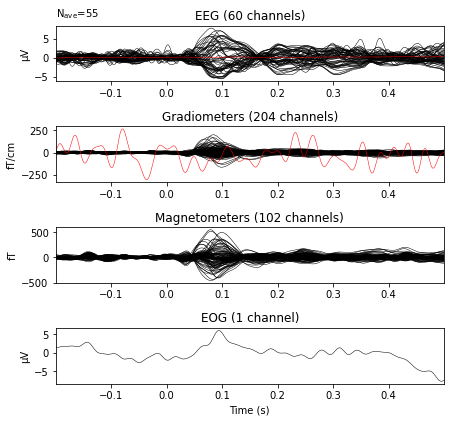

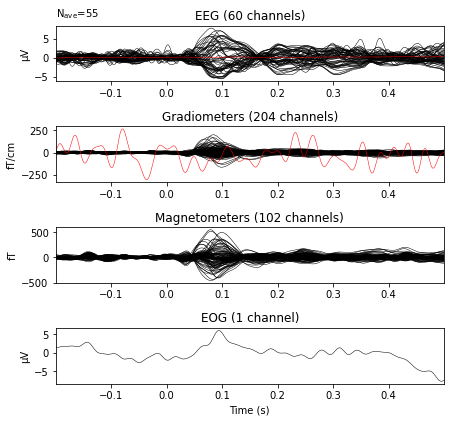

In [5]:
evks['aud/left'].plot(exclude=[])

Notice the completely flat EEG channel and the noisy gradiometer channel
plotted in red color. Like many MNE-Python plotting functions,
:meth:`evoked.plot() <mne.Evoked.plot>` has a ``picks`` parameter that can
select channels to plot by name, index, or type. In the next plot we'll show
only magnetometer channels, and also color-code the channel traces by their
location by passing ``spatial_colors=True``. Finally, we'll superimpose a
trace of the :term:`global field power <GFP>` across channels:



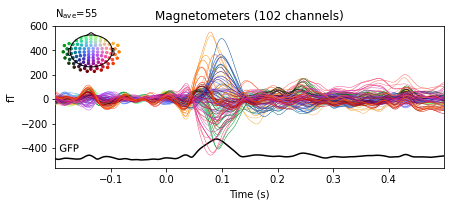

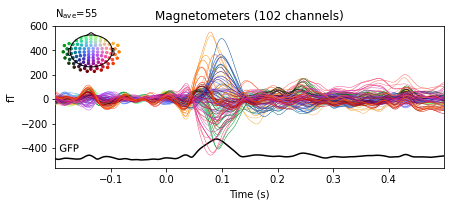

In [6]:
evks['aud/left'].plot(picks='mag', spatial_colors=True, gfp=True)

## Plotting scalp topographies

In an interactive session, the butterfly plots seen above can be
click-dragged to select a time region, which will pop up a map of the average
field distribution over the scalp for the selected time span. You can also
generate scalp topographies at specific times or time spans using the
:meth:`~mne.Evoked.plot_topomap` method:



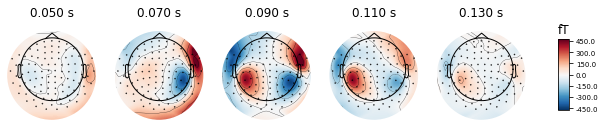

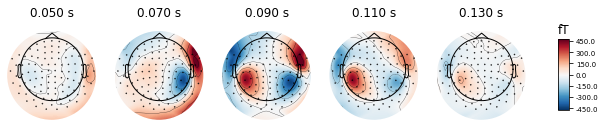

In [7]:
times = np.linspace(0.05, 0.13, 5)
evks['aud/left'].plot_topomap(ch_type='mag', times=times, colorbar=True)

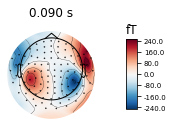

Text(0.5, 0.05, 'average from 40-140 ms')

In [8]:
fig = evks['aud/left'].plot_topomap(ch_type='mag', times=0.09, average=0.1)
fig.text(0.5, 0.05, 'average from 40-140 ms', ha='center')

Additional examples of plotting scalp topographies can be found in
`ex-evoked-topomap`.


## Arrow maps

Scalp topographies at a given time point can be augmented with arrows to show
the estimated magnitude and direction of the magnetic field, using the
function :func:`mne.viz.plot_arrowmap`:



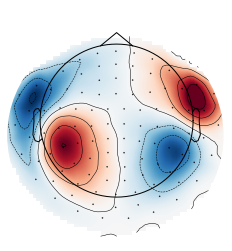

In [ ]:
mags = evks['aud/left'].copy().pick_types(meg='mag')
mne.viz.plot_arrowmap(mags.data[:, 175], mags.info, extrapolate='local')

## Joint plots

Joint plots combine butterfly plots with scalp topographies, and provide an
excellent first-look at evoked data; by default, topographies will be
automatically placed based on peak finding. Here we plot the
right-visual-field condition; if no ``picks`` are specified we get a separate
figure for each channel type:



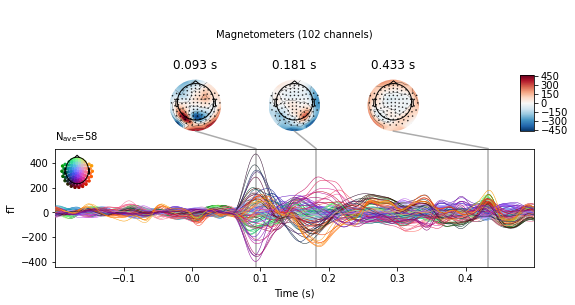

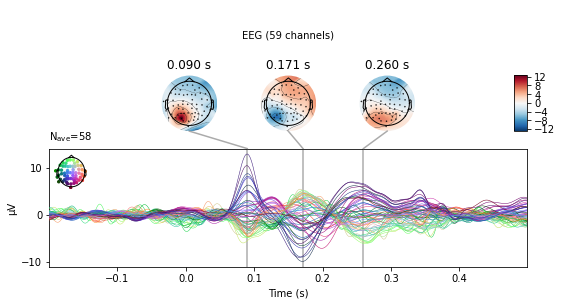

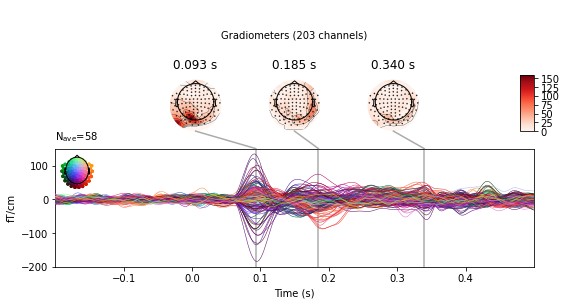

[<Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>,
 <Figure size 576x302.4 with 7 Axes>]

In [9]:
evks['vis/right'].plot_joint()

Like :meth:`~mne.Evoked.plot_topomap` you can specify the ``times`` at which
you want the scalp topographies calculated, and you can customize the plot in
various other ways as well. See :meth:`mne.Evoked.plot_joint` for details.


## Comparing ``Evoked`` objects

To compare :class:`~mne.Evoked` objects from different experimental
conditions, the function :func:`mne.viz.plot_compare_evokeds` can take a
:class:`list` or :class:`dict` of :class:`~mne.Evoked` objects and plot them
all on the same axes. Like most MNE-Python visualization functions, it has a
``picks`` parameter for selecting channels, but by default will generate one
figure for each channel type, and combine information across channels of the
same type by calculating the :term:`global field power <GFP>`. Information
may be combined across channels in other ways too; support for combining via
mean, median, or standard deviation are built-in, and custom callable
functions may also be used, as shown here:



combining channels using "mean"
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


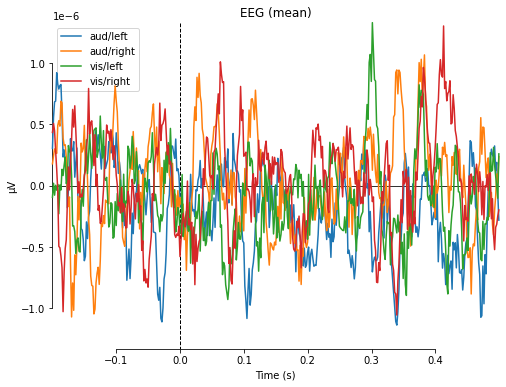

combining channels using "median"
combining channels using "median"
combining channels using "median"
combining channels using "median"


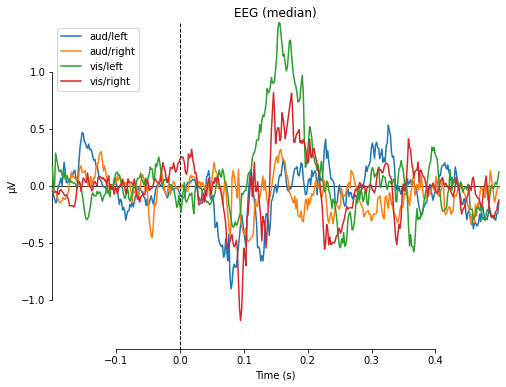

combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"
combining channels using "gfp"


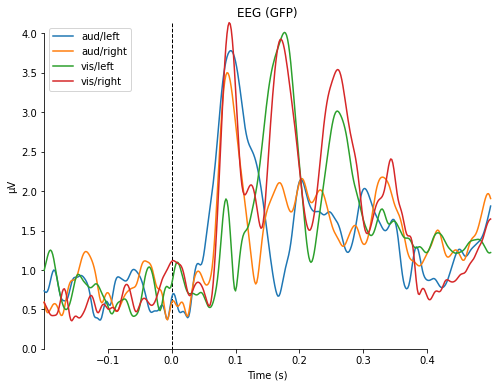

combining channels using "<function custom_func at 0x138f6a790>"
combining channels using "<function custom_func at 0x138f6a790>"
combining channels using "<function custom_func at 0x138f6a790>"
combining channels using "<function custom_func at 0x138f6a790>"


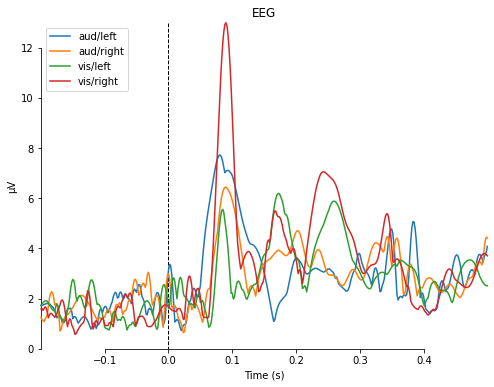

In [10]:
def custom_func(x):
    return x.max(axis=1)


for combine in ('mean', 'median', 'gfp', custom_func):
    mne.viz.plot_compare_evokeds(evks, picks='eeg', combine=combine)

One nice feature of :func:`~mne.viz.plot_compare_evokeds` is that when
passing evokeds in a dictionary, it allows specifying plot styles based on
``/``-separated substrings of the dictionary keys (similar to epoch
selection; see `tut-section-subselect-epochs`). Here, we specify colors
for "aud" and "vis" conditions, and linestyles for "left" and "right"
conditions, and the traces and legend are styled accordingly.



In [ ]:
mne.viz.plot_compare_evokeds(evks, picks='MEG 1811', colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'))

## Image plots

Like :class:`~mne.Epochs`, :class:`~mne.Evoked` objects also have a
:meth:`~mne.Evoked.plot_image` method, but unlike :meth:`epochs.plot_image()
<mne.Epochs.plot_image>`, :meth:`evoked.plot_image() <mne.Evoked.plot_image>`
shows one *channel* per row instead of one *epoch* per row. Again, a
``picks`` parameter is available, as well as several other customization
options; see :meth:`~mne.Evoked.plot_image` for details.



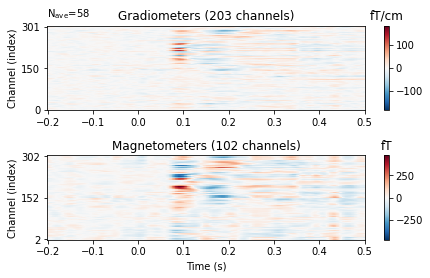

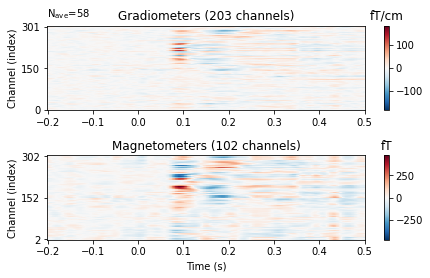

In [11]:
evks['vis/right'].plot_image(picks='meg')

## Topographical subplots

For sensor-level analyses it can be useful to plot the response at each
sensor in a topographical layout. The :func:`~mne.viz.plot_compare_evokeds`
function can do this if you pass ``axes='topo'``, but it can be quite slow
if the number of sensors is too large, so here we'll plot only the EEG
channels:



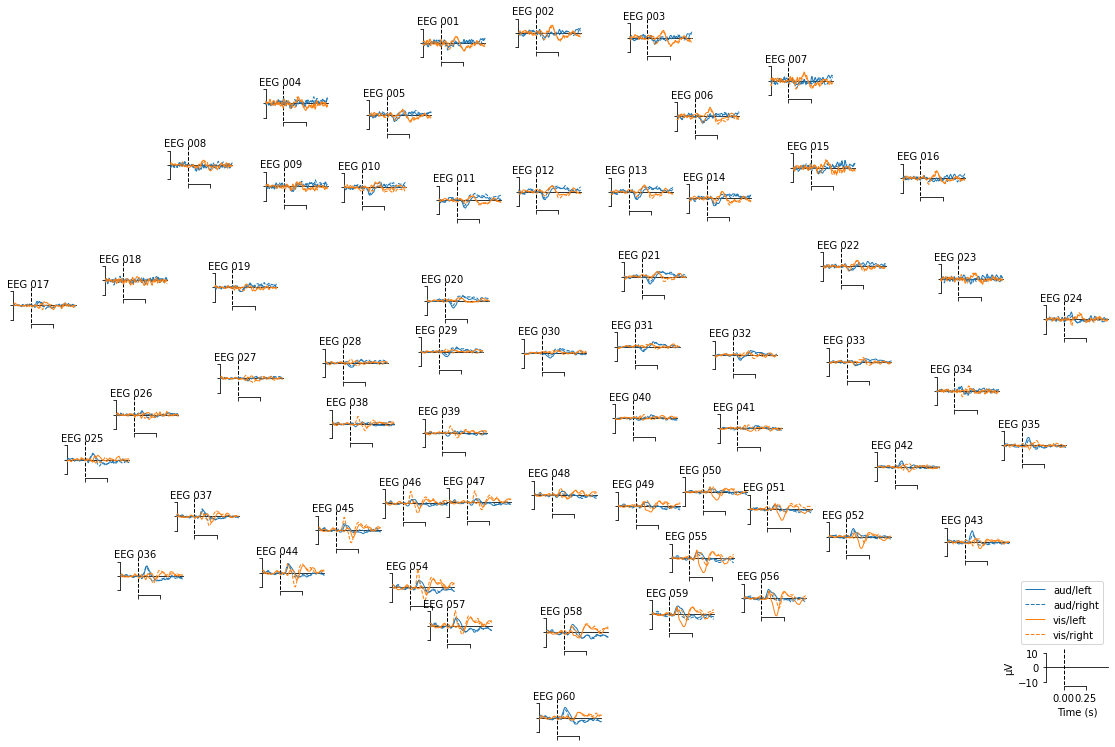

[<Figure size 1296x1008 with 60 Axes>]

In [12]:
mne.viz.plot_compare_evokeds(evks, picks='eeg', colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'),
                             axes='topo', styles=dict(aud=dict(linewidth=1),
                                                      vis=dict(linewidth=1)))

For larger numbers of sensors, the method :meth:`evoked.plot_topo()
<mne.Evoked.plot_topo>` and the function :func:`mne.viz.plot_evoked_topo`
can both be used. The :meth:`~mne.Evoked.plot_topo` method will plot only a
single condition, while the :func:`~mne.viz.plot_evoked_topo` function can
plot one or more conditions on the same axes, if passed a list of
:class:`~mne.Evoked` objects. The legend entries will be automatically drawn
from the :class:`~mne.Evoked` objects' ``comment`` attribute:



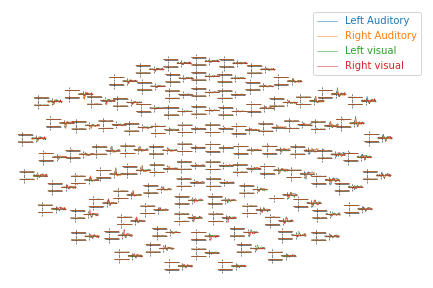

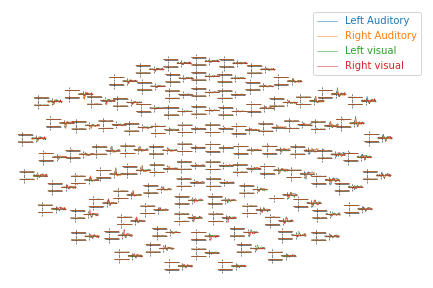

In [13]:
mne.viz.plot_evoked_topo(evokeds_list)

By default, :func:`~mne.viz.plot_evoked_topo` will plot all MEG sensors (if
present), so to get EEG sensors you would need to modify the evoked objects
first (e.g., using :func:`mne.pick_types`).

<div class="alert alert-info"><h4>Note</h4><p>In interactive sessions, both approaches to topographical plotting allow
    you to click one of the sensor subplots to pop open a larger version of
    the evoked plot at that sensor.</p></div>


## 3D Field Maps

The scalp topographies above were all projected into 2-dimensional overhead
views of the field, but it is also possible to plot field maps in 3D. To do
this requires a :term:`trans` file to transform locations between the
coordinate systems of the MEG device and the head surface (based on the MRI).
You *can* compute 3D field maps without a ``trans`` file, but it will only
work for calculating the field *on the MEG helmet from the MEG sensors*.



In [16]:
subjects_dir = os.path.join(sample_data_folder, 'subjects')
sample_data_trans_file = os.path.join(sample_data_folder, 'MEG', 'sample',
                                      'sample_audvis_raw-trans.fif')

By default, MEG sensors will be used to estimate the field on the helmet
surface, while EEG sensors will be used to estimate the field on the scalp.
Once the maps are computed, you can plot them with :meth:`evoked.plot_field()
<mne.Evoked.plot_field>`:



In [17]:
maps = mne.make_field_map(evks['aud/left'], trans=sample_data_trans_file,
                          subject='sample', subjects_dir=subjects_dir)
evks['aud/left'].plot_field(maps, time=0.1)

Using surface from /Users/jose/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Getting helmet for system 306m
Prepare EEG mapping...
Computing dot products for 59 electrodes...
Computing dot products for 2562 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 21/59 components to omit less than 0.001 (0.00097)
    The map will have average electrode reference
Prepare MEG mapping...
Computing dot products for 305 coils...
Computing dot products for 304 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 210/305 components to omit less than 0.0001 (9.9e-05)


AttributeError: 'NoneType' object has no attribute '_Renderer'

You can also use MEG sensors to estimate the *scalp* field by passing
``meg_surf='head'``. By selecting each sensor type in turn, you can compare
the scalp field estimates from each.



In [18]:
for ch_type in ('mag', 'grad', 'eeg'):
    evk = evks['aud/right'].copy().pick(ch_type)
    _map = mne.make_field_map(evk, trans=sample_data_trans_file,
                              subject='sample', subjects_dir=subjects_dir,
                              meg_surf='head')
    fig = evk.plot_field(_map, time=0.1)
    mne.viz.set_3d_title(fig, ch_type, size=20)

Using surface from /Users/jose/mne_data/MNE-sample-data/subjects/sample/bem/sample-5120-5120-5120-bem.fif.
Prepare MEG mapping...
Computing dot products for 102 coils...
Computing dot products for 2562 surface locations...
Field mapping data ready
    Preparing the mapping matrix...
    Truncating at 57/102 components to omit less than 0.0001 (9.9e-05)


AttributeError: 'NoneType' object has no attribute '_Renderer'